In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import seed_detection as sd
from Functions import region_merging as rm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Report

## Region Growing Algorithm
The progress of our region growing algorithm is shown on an example image.

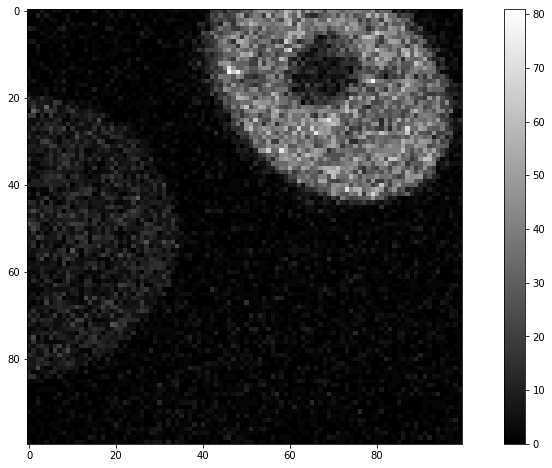

In [26]:
image_intensity = sk.imread("Data/N2DH-GOWT1/img/t01.tif")
image_intensity = image_intensity[300:400, 400:500]
ip.show_image(image_intensity, 15, 8)

### Seeded Region Growing

#### Seed Selection

0.0784313725490196


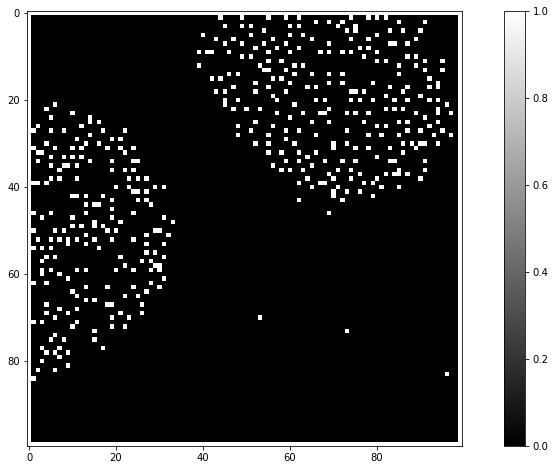

In [27]:
image_seeds = sd.seeds(image_intensity, 1)
ip.show_image(image_seeds, 15, 8)
image_regions = sd.seed_merging(image_seeds)

#### Region Growing based on Selected Seeds

1000
2000
3000
4000
5000
6000
7000
8000
9000


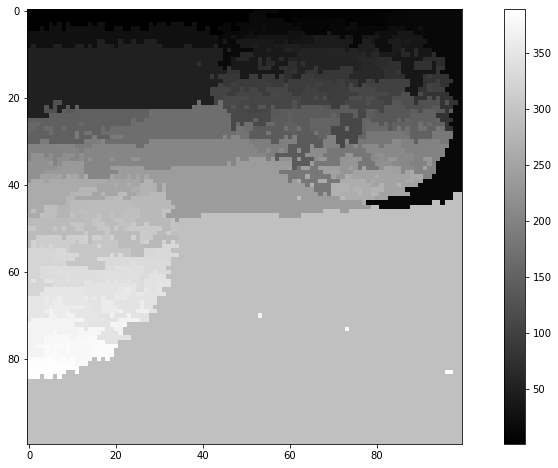

In [28]:
image_regions = srg.region_growing(image_intensity, image_regions)
ip.show_image(image_regions,15,8)

### Region Merging
In both algorithms, seeded and unseeded region growing too many regions are received due to intensity differences in
background as well as in cell nuclei. To solve this over-segmentation a region merging algorithm was implemented.
The received regions are merged by two criteria: similarity of intensity values and region size.

#### Region Merging by Similarity of Intensity

The first selection criteria is implemented via the following procedure:
1. First the neighboring regions are determined for every region and stored in a 2d numpy array.
1. This is used to calculate the distances between all neighboring regions which are stored in an upper triangle 2d
numpy array. The distance between two regions is calculated using $$dist = \frac{\bar r_m - \bar r_n}{intensity_{max}}$$.
1. Then the most similar regions are selected and merged.
1. This procedure is repeated until the distance between the most similar regions is bigger than a threshold. For that, in every
iteration the mean intensity value of the newly merged region, and the distances to its neighboring regions are updated.
The numpy array, in which neighboring regions are stored is updated as well.

#### Region Merging by Size

Region merging by size follows the steps below:
1. First the size of every region is calculated and stored in a 1d array.
1. The smallest region is selected and compared to a threshold. If it is smaller, the algorithm continues.
1. The previously determined neighboring regions are used to find out the most similar neighboring region by calculating
the distances using the same formula. The selected smallest region is merged to its most similar neighbor.
1. Afterwards, region sizes are updated, the smallest region is recomputed and its size is compared to the threshold.
1. The next most similar neighboring region is determined based on recalculated distances and neighboring regions.
The algorithm stops as soon as the smallest region is bigger than the threshold.

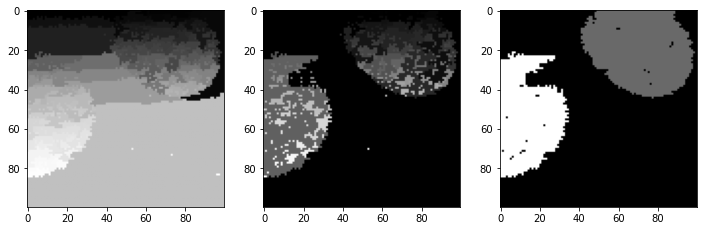

In [29]:
image_for_region_merging = image_regions.copy()
results_region_merging_similarity = rm.distance_merging_while(image_for_region_merging, 0.05, image_intensity)
image_rm_similarity, inter_region_neighbors, means = results_region_merging_similarity
image_rm_size = rm.region_merging_size(image_intensity, image_rm_similarity.copy(), inter_region_neighbors, means, 500)
ip.show_images_side_by_side(image_regions, image_rm_similarity, image_rm_size)

The figure compares the over-segmented image with the merged image after region merging by intensity similarity and
after complete merging.

## Challenges

#Runtime errors